## Modules and model

### Importing module

In [28]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from transformers import pipeline

### Pipeline 'text-classification' model by hugging face

In [29]:
pipe = pipeline("text-classification")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


### Dataset for training

In [30]:
X = [
    'this movie was great!',
    'the plot was boring and predictable.',
    'the acting was superb.',
    'i would not recommend this movie.',
    'the soundtrack was amazing.',
    'this movie was terrible.',
    'the plot was engaging and kept me hooked.',
    'the acting was subpar.',
    'i highly recommend this movie.',
    'the direction was sloppy.',
    'the cinematography was beautiful.',
    'the script was poorly written.',
    'the performances were lackluster.',
    'i loved this film.',
    'the special effects were impressive.',
    'the storyline was captivating.',
    'the characters were well-developed.',
    'i couldn\'t take my eyes off the screen.',
    'the pacing was off.',
    'i was disappointed by the lack of depth.',
    'the movie had me on the edge of my seat.',
    'the dialogues felt forced.',
    'i was pleasantly surprised.',
    'the ending was satisfying.',
    'the visuals were stunning.',
    'the pacing was perfect.',
    'i was blown away by the performances.',
    'the humor in the movie was great.',
    'i couldn\'t stop laughing.',
    'the themes explored were thought-provoking.',
]

y = ['positive', 'negative', 'positive', 'negative', 'positive',
    'negative', 'positive', 'negative', 'positive', 'negative',
    'positive', 'negative', 'negative', 'positive', 'positive',
    'positive', 'positive', 'positive', 'negative', 'negative',
    'positive', 'negative', 'positive', 'positive', 'positive',
    'negative', 'positive', 'positive', 'positive', 'negative']

## Training

### Filtering dataset

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train the classifier (Multinomial Naive Bayes)
clf = MultinomialNB()

train_accuracy = []
test_accuracy = []

### Training of model

In [32]:
num_iterations = 10
for i in range(num_iterations):
    clf.fit(X_train_tfidf, y_train)

    train_predictions = clf.predict(X_train_tfidf)
    test_predictions = clf.predict(X_test_tfidf)

    train_accuracy.append(accuracy_score(y_train, train_predictions))
    test_accuracy.append(accuracy_score(y_test, test_predictions))

### Visualization of model

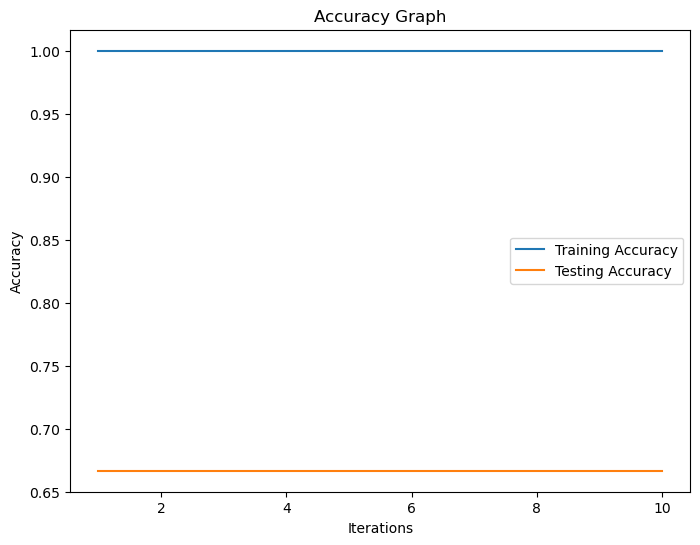

In [33]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, num_iterations + 1), test_accuracy, label='Testing Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.show()

### Checking accuracy

In [34]:
accuracy_custom = clf.score(X_test_tfidf, y_test)
print(f'Accuracy: {accuracy_custom}')

Accuracy: 0.6666666666666666


## Example

### Input data for prediction

In [35]:
input_data = [
    "The acting was superb and captivating.",
    "I highly recommend this movie to everyone!",
    "The plot was engaging and kept me hooked until the end.",
    "The soundtrack was amazing and added depth to the scenes.",
    "The characters were well-developed and relatable.",
    "The acting was terrible and ruined the movie.",
    "I would not recommend this film to anyone.",
    "The plot was confusing and hard to follow.",
    "The special effects were disappointing and unrealistic.",
    "Overall, a disappointing movie that failed to impress."
]

### Predict using custom model

In [36]:
input_data_reshaped = vectorizer.transform(input_data)

predictions_custom = clf.predict_proba(input_data_reshaped)

print('Custom Model Predictions:')
for text, prediction in zip(input_data, predictions_custom):
    predicted_label = 'NEGATIVE' if prediction[0] > prediction[1] else 'POSITIVE'
    prediction_score = max(prediction)
    print(f'Input: {text}')
    print(f'Prediction: {{\'label\': \'{predicted_label}\', \'score\': {prediction_score}}}')
    print()

Custom Model Predictions:
Input: The acting was superb and captivating.
Prediction: {'label': 'POSITIVE', 'score': 0.5891628759334891}

Input: I highly recommend this movie to everyone!
Prediction: {'label': 'NEGATIVE', 'score': 0.5462273361285483}

Input: The plot was engaging and kept me hooked until the end.
Prediction: {'label': 'POSITIVE', 'score': 0.6522014219493569}

Input: The soundtrack was amazing and added depth to the scenes.
Prediction: {'label': 'POSITIVE', 'score': 0.585746384941752}

Input: The characters were well-developed and relatable.
Prediction: {'label': 'POSITIVE', 'score': 0.6714809600117484}

Input: The acting was terrible and ruined the movie.
Prediction: {'label': 'NEGATIVE', 'score': 0.558910167419696}

Input: I would not recommend this film to anyone.
Prediction: {'label': 'NEGATIVE', 'score': 0.5615582181774045}

Input: The plot was confusing and hard to follow.
Prediction: {'label': 'POSITIVE', 'score': 0.5048994150772501}

Input: The special effects wer

### Predict using pipeline model

In [37]:
predictions_pipeline = pipe(input_data)
pipe(["This restaurant is awesome", "This restaurant is awful"])

print('Pipeline Model Predictions:')
for text, prediction in zip(input_data, predictions_pipeline):
    print(f'Input: {text}')
    print(f'Prediction: {prediction}')
    print()

Pipeline Model Predictions:
Input: The acting was superb and captivating.
Prediction: {'label': 'POSITIVE', 'score': 0.9998867511749268}

Input: I highly recommend this movie to everyone!
Prediction: {'label': 'POSITIVE', 'score': 0.999874472618103}

Input: The plot was engaging and kept me hooked until the end.
Prediction: {'label': 'POSITIVE', 'score': 0.9989327788352966}

Input: The soundtrack was amazing and added depth to the scenes.
Prediction: {'label': 'POSITIVE', 'score': 0.9998757839202881}

Input: The characters were well-developed and relatable.
Prediction: {'label': 'POSITIVE', 'score': 0.9983476400375366}

Input: The acting was terrible and ruined the movie.
Prediction: {'label': 'NEGATIVE', 'score': 0.9997909665107727}

Input: I would not recommend this film to anyone.
Prediction: {'label': 'POSITIVE', 'score': 0.8013373017311096}

Input: The plot was confusing and hard to follow.
Prediction: {'label': 'NEGATIVE', 'score': 0.9997655749320984}

Input: The special effects 